# OpenCV Tutorial

In [2]:
# import opencv module
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

# For interactive python:
%matplotlib inline  

## Reading the image

We can use OpenCV's cv2.imread() function to read an image. The image is read as a numpy array, which means we can use both Numpy OR OpenCV to perform operations on an image.

In [3]:
img = cv2.imread('lenna.png')

In [4]:
# What the 'img' variable looks like
img

array([[[127, 137, 225],
        [127, 137, 224],
        [119, 134, 227],
        ...,
        [128, 141, 227],
        [124, 150, 232],
        [104, 120, 213]],

       [[127, 137, 225],
        [127, 136, 224],
        [119, 134, 227],
        ...,
        [130, 144, 230],
        [126, 155, 238],
        [105, 124, 219]],

       [[122, 137, 227],
        [118, 134, 224],
        [117, 133, 228],
        ...,
        [106, 113, 209],
        [ 96,  97, 189],
        [ 80,  61, 149]],

       ...,

       [[ 60,  28,  90],
        [ 61,  29,  95],
        [ 63,  28,  97],
        ...,
        [ 68,  42, 126],
        [ 73,  58, 148],
        [ 73,  59, 158]],

       [[ 61,  24,  87],
        [ 62,  27,  92],
        [ 61,  25,  95],
        ...,
        [ 78,  58, 143],
        [ 80,  67, 167],
        [ 78,  65, 169]],

       [[ 58,  22,  84],
        [ 62,  29,  95],
        [ 59,  24,  93],
        ...,
        [ 84,  67, 159],
        [ 81,  70, 176],
        [ 80,  71, 182]]

In [7]:
# 'img' variable type
type(img)

numpy.ndarray

In [8]:
# We can also find the size and dimensions of the image. Both .size and .shape are numpy functions
img.size   # total number of pixels

145200

In [9]:
# shape (dimensions) of the image
img.shape

(220, 220, 3)

### Displaying an Image

Displaying an image can be done with the OpenCV function: cv2.imshow('image display name', variable_name). We also need to execute a cv2.waitKey() function to stop Python from crashing.

```
cv2.imshow('lenna', img)
cv2.waitKey(1000)   # wait for 1 second

```

However, this does not work in Jupyter's interactive python. We must use matplotlib to display images here

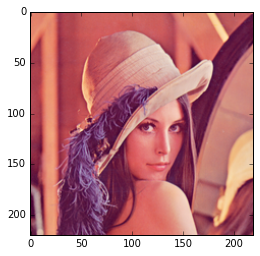

In [12]:
# for single images, matplotlib may be better
plt.imshow(img)

__Notice anything weird?__  
The color of the image looks weird because OpenCV uses a BGR color scheme, while Matplotlib displays images in RGB. Thus, we must convert the image to RGB first

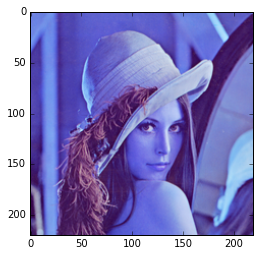

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Now we get the correct image. Lets run some operations on the image

## Basic Operations

A color image is represented as a 3D array. It is a collection of three 2D images in the R, G, and B channels.  
We can use numpy to split the image into its channels.

In [14]:
# Split into three separate images using numpy indexing
red_img = img[:,:,0]
green_img = img[:,:,1]
blue_img = img[:,:,2]


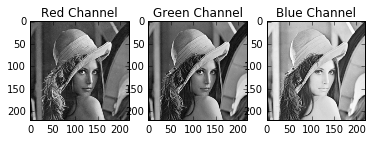

In [15]:
# Display all three images
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Red Channel')
ax1.imshow(red_img, cmap='gray')

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Green Channel')
ax2.imshow(green_img, cmap='gray')

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Blue Channel')
ax3.imshow(blue_img, cmap='gray')

We can also modify pixel values using numpy indexing. Let's create a blue patch in the middle of the image.

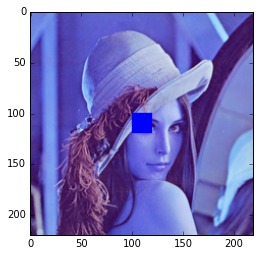

In [17]:
blue_patch_img = copy.deepcopy(img)    #create a deep copy of the image. Why deep copy?
blue_patch_img[100:120, 100:120, :] = [0,0,255]
plt.imshow(blue_patch_img)


We can also copy Lenna's face onto the image.

In [18]:
new_img = copy.deepcopy(img)   # Again, create a deep copy
lenna_face = img[100:160, 80:150, :]

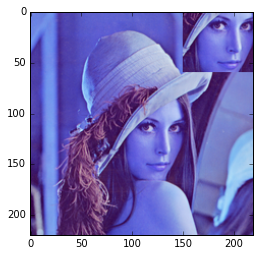

In [19]:
# Make sure to match the dimensions! If you don't you'll get a dimension mismatch error
new_img[0:60, 150:220, :]=lenna_face
plt.imshow(new_img)

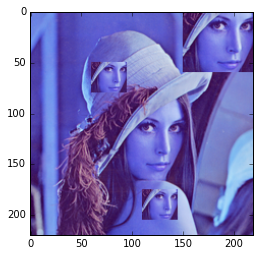

In [20]:
# Lastly, we can also resize the image and place it wherever it fits!
# Currently, lenna_face has dimension of (60,70, 3). Let's change it to (30, 35, 3)
lenna_face = cv2.resize(lenna_face, (35, 30))   # Note that resize uses (x, y) 
new_img[50:80, 60:95, :] = lenna_face
new_img[175:205, 110:145, :] = lenna_face
plt.imshow(new_img)

### OpenCV Functions 

There are many OpenCV functions that you may use. A friendly read-the-docs page that I used can be found in this __[link](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html).__    
Otherwise, use Google.  

  

Let's try using the Canny Edge Detector. The Canny Edge detector is a very commonly used edge detector in computer vision.
  
Quick tip: In Jupyter, pressing __Tab__ will show you a list of available functions from the imported list of packages. Also, pressing __Shift+Tab__ inside the parentheses of a function will show you the possible input parameters of the function.

In [21]:
canny = cv2.Canny(img, 100, 200)
canny2 = cv2.Canny(img, 50, 120)

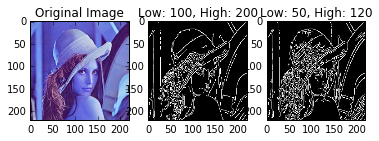

In [22]:
# Display images side by side
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,3,1)
ax1.set_title('Original Image')
ax1.imshow(img)

ax2 = fig1.add_subplot(1,3,2)
ax2.set_title('Low: 100, High: 200')
ax2.imshow(canny, cmap='gray')

ax3 = fig1.add_subplot(1,3,3)
ax3.set_title('Low: 50, High: 120')
ax3.imshow(canny2, cmap='gray')

In [23]:
# Save file into local disk
cv2.imwrite('canny_L100_H200.png', canny)

True